In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

servico = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=servico)

[WDM] - Downloading: 100%|█████████████████████████████████████████████████████████| 6.29M/6.29M [00:00<00:00, 77.6MB/s]


In [2]:
import os

caminho = os.getcwd()
arquivo = caminho + r"\Pagina Hashtag.html"
navegador.get(arquivo)
#navegador.get(r"C:\Users\Leandro Vasconcelos\Documents\Python Scripts\Cursos\Python Lyra\python\Selenium\Aula 3\Pagina Hashtag.html")
#navegador.get("https://www.google.com")

# Locating Elements

### navegador.find_element  -> 1 item
### navegador.find_elements -> 1 lista

## from selenium.webdriver.common.by import by

1. ID
2. CLASS_NAME
3. XPATH

### botão direito do mouse na tela ---> inspecionar ---> elementos

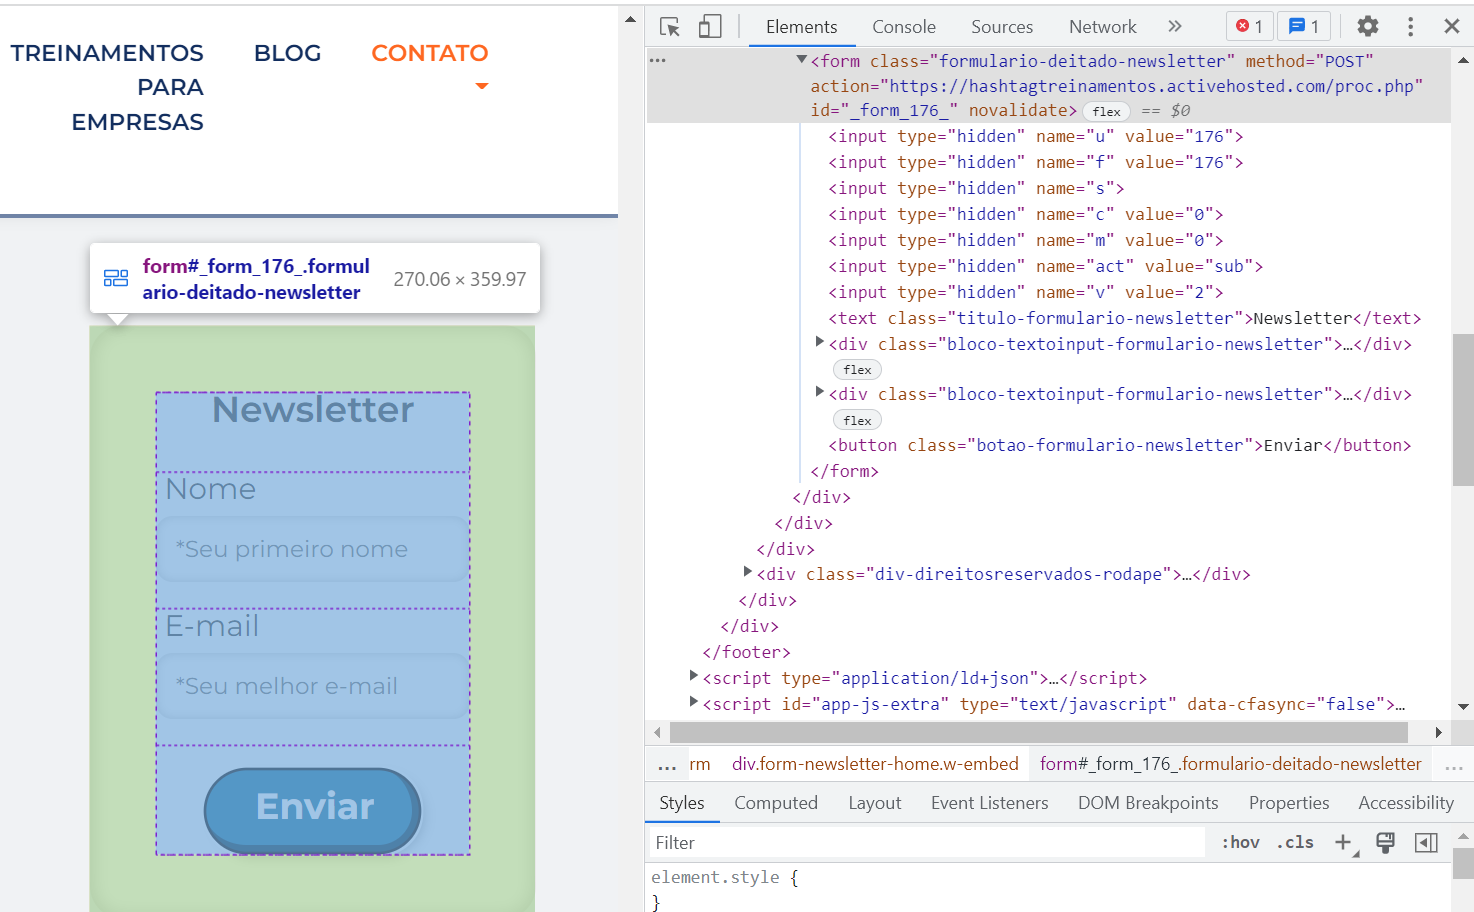



In [4]:
navegador.find_element(By.ID,'fullname').send_keys("Leandro Vasconcelos")

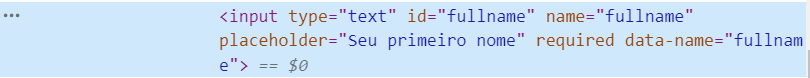

In [5]:
navegador.find_element(By.ID, 'email').send_keys("leovreis.python@gmail.com")

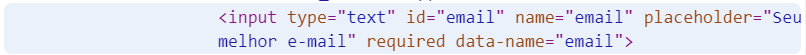

In [7]:
navegador.find_element(By.ID, '_form_176_submit').click()

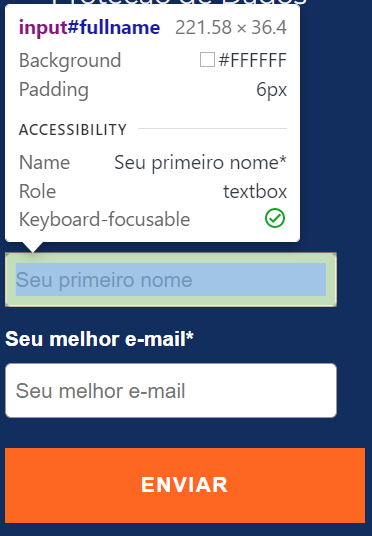

## Outros tipos de seleção do element 

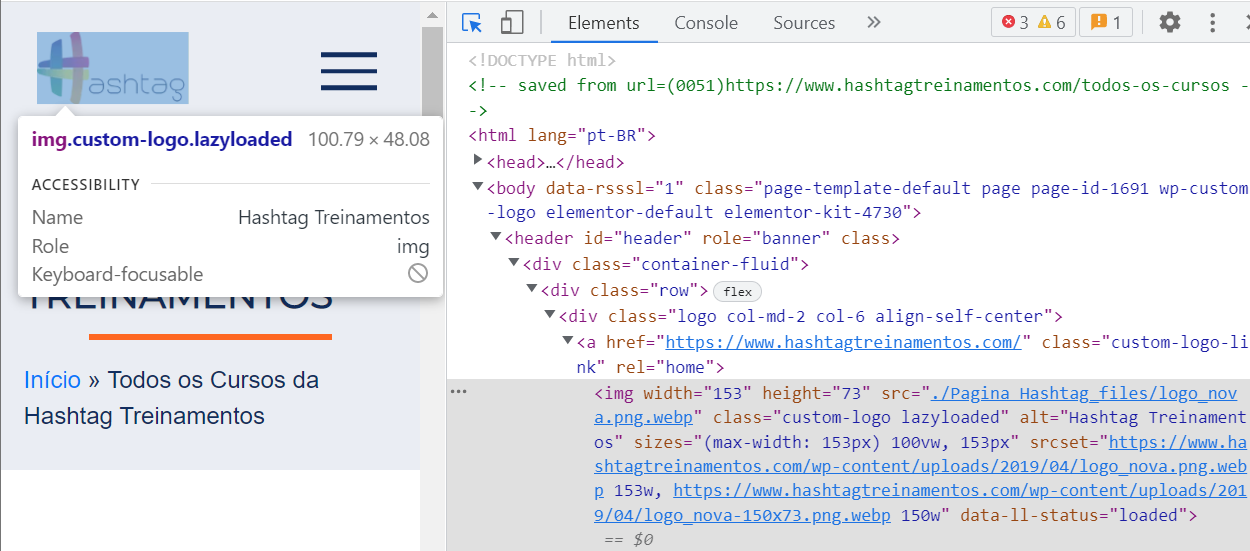

In [ ]:
navegador.find_element(By.CLASS_NAME, 'custom-logo').click()

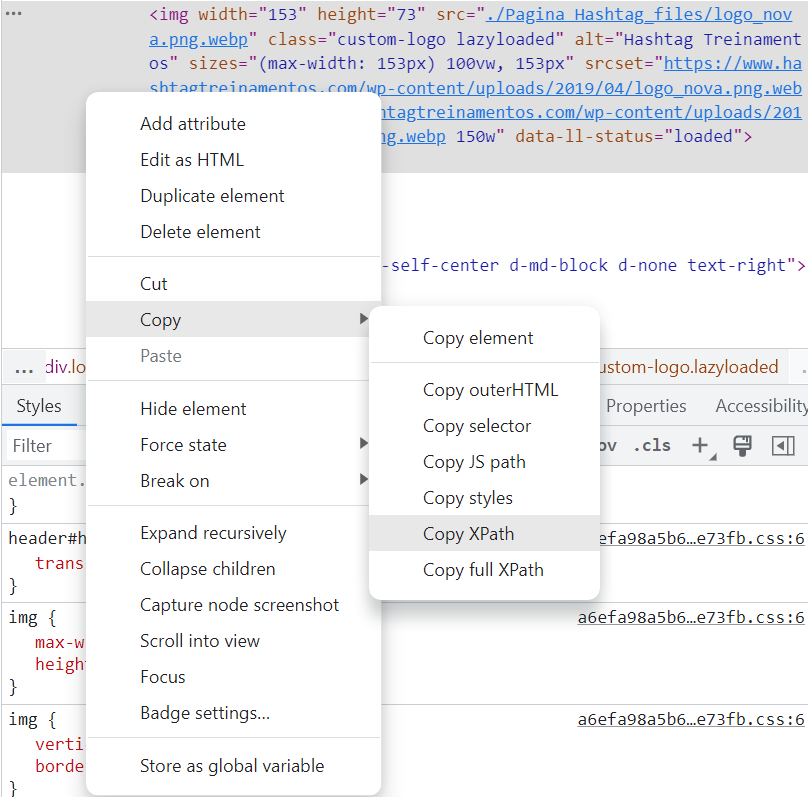

In [9]:
navegador.find_element(By.XPATH, '//*[@id="header"]/div/div/div[1]/a/img').click()

## from selenium.webdriver.common.by import by

4. TAG
5. LINK_TEXT / PARTIAL_LINK_TEXT
6. NAME

In [10]:
#Buscar o Título H2
titulo = navegador.find_element(By.TAG_NAME, 'h2').text
print(titulo)

TODOS OS CURSOS DA HASHTAG TREINAMENTOS


In [11]:
#Buscar um texto com LINK
numero = navegador.find_element(By.PARTIAL_LINK_TEXT, 'WhatsApp').text
print(numero)

(21) 99865-8852 (WhatsApp)


In [12]:
#Buscar um campo pelo name
navegador.find_element(By.NAME, 'email').send_keys("lvreis.python@gmail.com")

## Selecionar vários elementos de uma vez

### Pesquisando um elemento específico dentro de uma classe com vários elementos similares 

In [23]:
lista_elementos = navegador.find_elements(By.CLASS_NAME, 'nav-link')
for elemento in lista_elementos:
    if "blog" in elemento.text.lower():
        elemento.click()
        break

## Pegar informações de um elemento <br>

<li> texto </li>
<li> atributos </li>

### Exemplo: Link do WhatsApp

In [4]:
texto = navegador.find_element(By.XPATH, '/html/body/footer/div/div[1]/div[2]/div/a[2]').get_attribute('href')
print(texto)

https://api.whatsapp.com/send?phone=5521998658852&text=Ol%C3%A1%2C%20gostaria%20de%20tirar%20uma%20d%C3%BAvida%20%20sobre%20o%20curso%20online


### Exemplo: Imagens dos cursos

In [7]:
link = navegador.find_element(By.XPATH,'/html/body/section[2]/div/div[4]/figure/a').get_attribute('href')
print(link)

https://www.hashtagtreinamentos.com/curso-de-excel-online


### Exemplo: Percorrendo uma árvore --- Pegar todos os links das imagens

In [16]:
lista_fig = navegador.find_elements(By.TAG_NAME,'figure')
for elemento in lista_fig:
    try:
        link = elemento.find_element(By.TAG_NAME,'a').get_attribute('href')
        print(link)
    except:
        continue

https://www.hashtagtreinamentos.com/curso-de-excel-online
https://www.hashtagtreinamentos.com/curso-power-bi
https://www.hashtagtreinamentos.com/curso-python
https://www.hashtagtreinamentos.com/curso-sql
https://www.hashtagtreinamentos.com/curso-vba-excel


### Solução Percorrendo uma árvore sem utilizar o Try --- by LVReis

In [51]:
lista_fig = navegador.find_elements(By.TAG_NAME,'figure')
for item in lista_fig:
    valor = item.find_elements(By.TAG_NAME,'a')
    if (len(valor) > 0):
        link = item.find_element(By.TAG_NAME,'a').get_attribute('href')
        print(link)  

https://www.hashtagtreinamentos.com/curso-de-excel-online
https://www.hashtagtreinamentos.com/curso-power-bi
https://www.hashtagtreinamentos.com/curso-python
https://www.hashtagtreinamentos.com/curso-sql
https://www.hashtagtreinamentos.com/curso-vba-excel


### Selecionando outros elementos

In [3]:
import os

caminho = os.getcwd()
arquivo = caminho + r"\formulario.html"
navegador.get(arquivo)

In [6]:
#botão
navegador.find_element(By.XPATH, '/html/body/form/input[1]').click()
alerta = navegador.switch_to.alert
alerta.accept()

In [8]:
#checkbox
navegador.find_element(By.XPATH, '/html/body/form/input[3]').click()

valor = navegador.find_element(By.XPATH, '/html/body/form/input[3]').is_selected()
print(valor)

False


In [13]:
#canal_rgb
navegador.find_element(By.XPATH,'/html/body/form/input[4]').send_keys('#2143E8')

valor = navegador.find_element(By.XPATH,'/html/body/form/input[4]').get_attribute("value")
print(valor)

#2143e8


In [11]:
#caixa_de_texto
navegador.find_element(By.XPATH, '/html/body/form/input[16]').send_keys("Vasco")

valor = navegador.find_element(By.XPATH, '/html/body/form/input[16]').get_attribute("value")
print(valor)

Vasco


In [5]:
#botão_de_data
navegador.find_element(By.XPATH, '/html/body/form/input[6]').send_keys('15/02/1984')

valor = navegador.find_element(By.XPATH, '/html/body/form/input[6]').get_attribute("value")
print(valor)

1984-02-15


In [8]:
#botão_de_data_hora
navegador.find_element(By.XPATH, '/html/body/form/input[7]').send_keys('15/02/1984', Keys.TAB, '22:31')

valor = navegador.find_element(By.XPATH, '/html/body/form/input[7]').get_attribute("value")
print(valor)

1984-02-15T22:59


In [10]:
#botão_selecionar_arquivo
navegador.find_element(By.XPATH, '/html/body/form/input[8]').send_keys(r'C:\Users\Leandro Vasconcelos\Downloads\formulario.html')

valor = navegador.find_element(By.XPATH, '/html/body/form/input[8]').get_attribute("value")
print(valor)

C:\fakepath\formulario.html


In [11]:
#botão_de_mes_ano
navegador.find_element(By.XPATH, '/html/body/form/input[9]').send_keys('janeiro', Keys.TAB, '1980')

valor = navegador.find_element(By.XPATH, '/html/body/form/input[9]').get_attribute("value")
print(valor)

1980-01


In [12]:
#caixa_de_texto - Numérico
navegador.find_element(By.XPATH, '/html/body/form/input[10]').clear()
navegador.find_element(By.XPATH, '/html/body/form/input[10]').send_keys("12345")

valor = navegador.find_element(By.XPATH, '/html/body/form/input[10]').get_attribute("value")
print(valor)

12345


In [13]:
#caixa_de_texto - Senha
navegador.find_element(By.XPATH, '/html/body/form/input[11]').clear()
navegador.find_element(By.XPATH, '/html/body/form/input[11]').send_keys("12345")

valor = navegador.find_element(By.XPATH, '/html/body/form/input[11]').get_attribute("value")
print(valor)

12345


In [14]:
#RadioButtons
navegador.find_element(By.XPATH, '/html/body/form/input[14]').click()

valor = navegador.find_element(By.XPATH, '/html/body/form/input[14]').is_selected()
print(valor)

True


In [17]:
#Caixa_de_Horas
navegador.find_element(By.XPATH, '/html/body/form/input[17]').clear()
navegador.find_element(By.XPATH, '/html/body/form/input[17]').send_keys('12:35')

valor = navegador.find_element(By.XPATH, '/html/body/form/input[17]').get_attribute("value")
print(valor)

12:35


In [20]:
#Caixa_de_Semana_Horas
navegador.find_element(By.XPATH, '/html/body/form/input[18]').clear()
navegador.find_element(By.XPATH, '/html/body/form/input[18]').send_keys('15', '2022')

valor = navegador.find_element(By.XPATH, '/html/body/form/input[18]').get_attribute("value")
print(valor)

2022-W15


In [22]:
#Bloco_de_Texto
navegador.find_element(By.XPATH, '//*[@id="story"]').clear()
navegador.find_element(By.XPATH, '//*[@id="story"]').send_keys('ABC', Keys.ENTER, 'DEF', Keys.ENTER, 'GHI')

valor = navegador.find_element(By.XPATH, '//*[@id="story"]').get_attribute("value")
print(valor)

ABC
DEF
GHI


In [26]:
#slider
elemento = navegador.find_element(By.XPATH, '/html/body/form/input[15]')

elemento.clear()
for i in range(50-30):
    elemento.send_keys(Keys.ARROW_LEFT)
    
valor = elemento.get_attribute("value")
print(valor)

30


In [29]:
#listas
navegador.find_element(By.XPATH, '/html/body/form/select[1]').send_keys('C')

valor = navegador.find_element(By.XPATH, '/html/body/form/select[1]').get_attribute("value")
print(valor)

c


In [34]:
#listas
navegador.find_element(By.XPATH, '/html/body/form/select[1]').click()

navegador.find_element(By.XPATH, '/html/body/form/select[1]/option[2]').click()

valor = navegador.find_element(By.XPATH, '/html/body/form/select[1]').get_attribute("value")
print(valor)

b


In [ ]:
#listas
elemento = navegador.find_element(By.TAG_NAME, 'select')

In [6]:
from selenium.webdriver.support.select import Select

elemento = navegador.find_element(By.TAG_NAME, 'select')
elemento_select = Select(elemento)

In [8]:
elemento_select.select_by_value('b')

In [10]:
elemento_select.select_by_visible_text('A')

In [11]:
elemento_select.select_by_index(2)

In [15]:
#ler o item selecionado
item = elemento_select.first_selected_option
print(item.get_attribute('value'))

c
